In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training
train_images.shape

(60000, 28, 28)

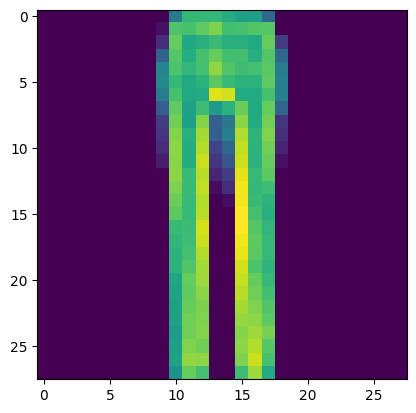

In [ ]:
pic=train_images[69]
plt.imshow(pic)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing, meaning we have 10 different classes. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

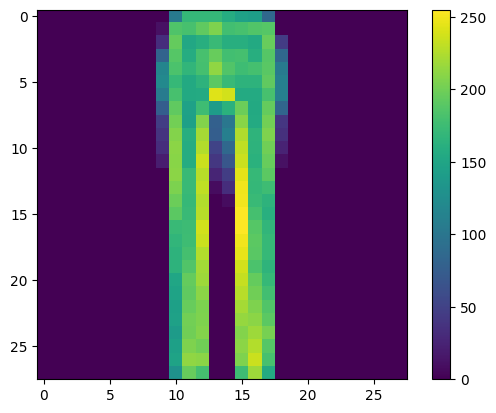

In [ ]:
plt.figure()
plt.imshow(train_images[69])
plt.colorbar() #Adds color bar to the right
plt.grid(False) #setting grid(True) will add grids to the image
plt.show()

#Data preprocessing
* The neural network starts working with random weights and biases that are in between the range 0 and 1.
* Having large vinformation values (such as 230 or 255) will cause mismatch, making it much more difficult for the network tot classify information.
* Sowe need to scale down our data between 0 and 1. or -1 and 1.
* We need to make our data as small as possible before feeding it to the neural network.

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0 #Pre process the test data too so we make sure data of the same form is used in both train and test cases

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
model = keras.Sequential([ #sequential: most basic form of neural network
    #DEFINE THE LAYERS WE WANT IN OUR NEURAL NETWORK
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) #Flatten allows us to take in a shape of 28 x 28(matrix structure) and flatten it into 784 (28*28) pixels
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) #Dense means that all neurons in the previous layer is connected to all the neurons in this layer. 128 means this layer has 128 neurons #Activation function: rectified linear unit
    keras.layers.Dense(10, activation='softmax') # output layer (3) #10 means that output layer will have 10 nodes (since we have 10 classes to predict from). Activation function = softmax makes sure all the values add upto 1 and that they are between 0 and 1
])

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
## HYPERPARAMETER TUNING

model.compile(optimizer='adam', #algorithm that performs gradient descent
              loss='sparse_categorical_crossentropy', #Our loss function
              metrics=['accuracy'])

In [ ]:
train_images.shape

(60000, 28, 28)

##Training the model

In [ ]:
model.fit(train_images,train_labels,epochs=10,batch_size=1)

Epoch 1/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.5021 - accuracy: 0.8197
Epoch 2/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.4177 - accuracy: 0.8558
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3924 - accuracy: 0.8651
Epoch 4/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3857 - accuracy: 0.8698
Epoch 5/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3778 - accuracy: 0.8717
Epoch 6/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3712 - accuracy: 0.8742
Epoch 7/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3642 - accuracy: 0.8771
Epoch 8/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.3633 - accuracy: 0.8788
Epoch 9/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3580 - accuracy: 0.8794
Epoch 10/10
60000/60000 [=====================

##Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.8551
Test accuracy: 0.8550999760627747


* If test accuracy < training accuracy => model is over fitting
* fix: reduce no. of epochs, so model does not memorize tha data

In [ ]:
model.fit(train_images,train_labels,epochs=2,batch_size=1) #Reduced no. of epochs

Epoch 1/2
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3547 - accuracy: 0.8839
Epoch 2/2
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3522 - accuracy: 0.8852


##Making predictions

In [ ]:
predictions = model.predict([test_images[0]])

ValueError: ignored

In [ ]:
predictions

In [ ]:
#getting the index of the highest probability value
np.argmax(predictions)

In [ ]:
all_predictions = model.predict(test_images)
all_predictions